In [203]:
main_data = [
    [(0, 29), (1, 78), (2,  9), (3, 36), (4, 49), (5, 11), (6, 62), (7, 56), (8, 44), (9, 21)],
    [(0, 43), (2, 90), (4, 75), (9, 11), (3, 69), (1, 28), (6, 46), (5, 46), (7, 72), (8, 30)],
    [(1, 91), (0, 85), (3, 39), (2, 74), (8, 90), (5, 10), (7, 12), (6, 89), (9, 45), (4, 33)],
    [(1, 81), (2, 95), (0, 71), (4, 99), (6,  9), (8, 52), (7, 85), (3, 98), (9, 22), (5, 43)],
    [(2, 14), (0,  6), (1, 22), (5, 61), (3, 26), (4, 69), (8, 21), (7, 49), (9, 72), (6, 53)],
    [(2, 84), (1,  2), (5, 52), (3, 95), (8, 48), (9, 72), (0, 47), (6, 65), (4,  6), (7, 25)],
    [(1, 46), (0, 37), (3, 61), (2, 13), (6, 32), (5, 21), (9, 32), (8, 89), (7, 30), (4, 55)],
    [(2, 31), (0, 86), (1, 46), (5, 74), (4, 32), (6, 88), (8, 19), (9, 48), (7, 36), (3, 79)],
    [(0, 76), (1, 69), (3, 76), (5, 51), (2, 85), (9, 11), (6, 40), (7, 89), (4, 26), (8, 74)],
    [(1, 85), (0, 13), (2, 61), (6,  7), (8, 64), (9, 76), (5, 47), (3, 52), (4, 90), (7, 45)]
]


In [204]:
import numpy as np
import random
from queue import Queue
import threading
import matplotlib.pyplot as plt

main_data = np.array(main_data)

In [205]:
class GeneCreator:
    jobs = 10
    operations = 10
    def gene_create(self, seed=1):
        random.seed(seed)
        queues = []
        gene = []
        for j in range(self.jobs):
            q = Queue()
            for o in range(self.operations):q.put(j*self.operations+o)
            queues.append(q)
        _ = 0
        while _ < self.jobs*self.operations:
            nucleotide = random.randint(0, self.jobs-1)
            if not queues[nucleotide].empty():
                gene.append(queues[nucleotide].get())
                _ += 1
        return gene
    def is_gene(self, gene):
        for index in gene:
            index = int(index)
            index_befor = [i for i in range(int(index/10)*10, index)]
            result = [element for element in gene if element in index_befor]
            if not result == index_befor: return False
        return True
'''
    TESTING
GC = GeneCreator()
for _ in range(500):
    gene = GC.gene_create()
    if GC.is_gene(gene) == False:
        print("FALSE HAPPEND")
'''

'\n    TESTING\nGC = GeneCreator()\nfor _ in range(500):\n    gene = GC.gene_create()\n    if GC.is_gene(gene) == False:\n        print("FALSE HAPPEND")\n'

In [206]:
class GanttChart:
    gene = []
    machines = 10
    jobs = 10
    operations = 10
    data = main_data.reshape((100,2))
    
    def __init__(self, gene) -> None:
        self.gene = gene
        self.mch_st = [[0] for _ in range(self.machines)]
        self.mch_fn = [[] for _ in range(self.machines)]
        self.job_next_start = [0 for _ in range(self.jobs)]
        
    def machin_id(self, index):
        return self.data[index][0]
    def machine_time(self, index):return self.data[index][1]
    
    def add_to_machine(self, index):
        id = self.machin_id(index)
        time = self.machine_time(index)
        
        if self.mch_st[id][-1] < self.job_next_start[int(index/self.jobs)]:
            self.mch_st[id][-1] = self.job_next_start[int(index/self.jobs)]
        
        finish_time = time+self.mch_st[id][-1]
        self.mch_fn[id].append(finish_time)
        self.mch_st[id].append(finish_time)
        
        self.job_next_start[int(index/self.jobs)] = finish_time
    
    def calculate(self):
        for nucleotide in self.gene:
            self.add_to_machine(nucleotide)

    def span(self):
        return np.max(np.array(self.mch_fn))

'''
    TESTING
    TEST DATA:
main_data = [
    [(0,29),(1,78),(2,9)],
    [(0,43),(2,90),(1,28)],
    [(1,91),(0,85),(2,74)]
]
    CONFIGURATIONS
machines = 3
jobs = 3
operations = 3
data = main_data.reshape((9,2))
    TEST GENE

gene = [3, 0, 4, 1, 2, 6, 5, 7, 8]

gantt = GanttChart(gene)
gantt.calculate()
print(gantt.span())
'''
# GC = GeneCreator()
# gene = GC.gene_create()

# gantt = GanttChart(gene)
# gantt.calculate()
# print(gantt.span())

2133


In [207]:
class JSSP():
    Mue = 20
    Population = []
    Children = []
    data = []
    MIN = 2000
    
    
    def __init__(self, seed=1) -> None:
        self.gene_create = GeneCreator()
        for _ in range(self.Mue): self.Population.append(self.gene_create.gene_create(seed))
    
    def run(self):
        for i in range(500):
            self.mutation()
            if i%600==0:self.selection()
            else:self.selection2()
            
            self.generation_result()
                        
        self.final_result()

    
    def selection2(self):
        all_ind = np.concatenate((self.Population, self.Children), axis=0)
        eva = np.array([self.function_evaluation(gene) for gene in all_ind])
        sorted_indices = np.argsort(eva)
        self.Population = all_ind[sorted_indices[:self.Mue]]
    
    def selection(self):
        all_ind = np.concatenate((self.Population, self.Children), axis=0)
        weights = np.array([self.function_evaluation(gene) for gene in all_ind])
        probabilities = 1 / weights
        probabilities /= probabilities.sum()
        chosen_rows = np.random.choice(len(all_ind), size=self.Mue, p=probabilities, replace=False)
        self.Population = all_ind[chosen_rows]

    
    def function_evaluation(self, gene):
        gantt = GanttChart(gene)
        gantt.calculate()
        return gantt.span()
    
    def mutation(self):
        self.Children = []
        i = 0
        while i<self.Mue:
            mutation_functions = [self.swap_mutation, self.swap_mutation, self.swap_mutation]
            chosen_mutation_function = random.choice(mutation_functions)
            mutated = chosen_mutation_function(self.Population[i])
            if self.gene_create.is_gene(mutated):
                self.Children.append(mutated)
                i+=1
        
    def swap_mutation(self, gene):
        mutated_gene = gene.copy()
        index1, index2 = np.random.choice(len(mutated_gene), size=2, replace=False)
        mutated_gene[index1], mutated_gene[index2] = gene[index2], gene[index1]
        return mutated_gene
    def scramble_mutation(self, gene):
        mutated_gene = gene.copy()
        index1, index2 = np.random.choice(len(mutated_gene), size=2, replace=False)
        mutated_gene[index1:index2+1] = np.random.permutation(mutated_gene[index1:index2+1]).tolist()
        return mutated_gene
    def inversion_mutation(self, gene):
        mutated_gene = gene.copy()
        index1, index2 = np.random.choice(len(mutated_gene), size=2, replace=False)
        mutated_gene[index1:index2+1] = np.flip(mutated_gene[index1:index2+1]).tolist()
        return mutated_gene
    
    def np_to_list(self, np_arr):
        if type(np_arr) == np.ndarray:
            return np_arr.tolist()
        return np_arr
    
    def generation_result(self):
        res = [self.function_evaluation(gene) for gene in self.Population]
        self.data.append(res)
        for i in res:
            if i < self.MIN: self.MIN=i
    
    def final_result(self):
        res = [self.function_evaluation(gene) for gene in self.Population]
        min_score_index = np.argmin(res)
        print(f"best gene: {self.Population[min_score_index]}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best gene: [10 40 70 49 30 71  0 60 72 11 73 61 12 74 62  1 90 31 32 80 33  2 75 41
  3 91 63  4 64 59 34 35 50 51 65 81 76  5  6 13 36 14  7 82 92 66 42 77
 43 93 83 84 44 52 15 67 29 85 37 86 19 68 20 45 53 38 87 94 21 54 95 88
 16 78 22 17 23 55 96 46 24 97 39 25 56 18 89 98 47 57 69  9 26 79  8 27
 99 48 28 58]


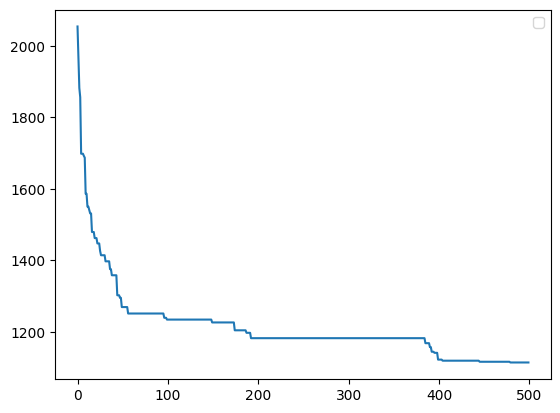

generation:0
all gene spans:[2133, 2133, 2133, 2133, 2133, 2133, 2133, 2133, 2133, 2133, 2133, 2133, 2133, 2241, 2094, 2080, 2133, 2156, 2133, 2054]
generation:1
all gene spans:[1965, 2000, 2001, 2015, 2015, 2038, 2054, 2054, 2080, 2080, 2094, 2094, 2133, 2133, 2133, 2133, 2133, 2133, 2133, 2133]
generation:2
all gene spans:[1882, 1965, 1965, 1966, 2000, 2000, 2001, 2015, 2015, 2015, 2015, 2018, 2038, 2044, 2054, 2054, 2054, 2054, 2054, 2080]
generation:3
all gene spans:[1856, 1882, 1890, 1902, 1910, 1910, 1943, 1954, 1954, 1965, 1965, 1965, 1966, 1966, 1992, 2000, 2000, 2000, 2001, 2001]
generation:4
all gene spans:[1698, 1856, 1856, 1877, 1880, 1882, 1882, 1890, 1902, 1902, 1910, 1910, 1922, 1943, 1943, 1954, 1954, 1954, 1965, 1965]
generation:5
all gene spans:[1698, 1698, 1828, 1856, 1856, 1856, 1856, 1859, 1875, 1877, 1877, 1880, 1880, 1882, 1882, 1882, 1882, 1884, 1890, 1902]
generation:6
all gene spans:[1698, 1698, 1698, 1698, 1772, 1784, 1785, 1810, 1828, 1828, 1830, 1856, 1856,

In [208]:
def JSSP_THREAD_FUNC(seed):
    jssp = JSSP(seed=seed)
    jssp.run()
    return jssp.data
    

x = []
y = []
data = JSSP_THREAD_FUNC(1)
for index ,row in enumerate(data):
    x.append(index)
    y.append(min(row))
plt.xlabel = "generation"
plt.ylabel = "span"
plt.plot(x,y)
plt.legend()
plt.show()
for index ,row in enumerate(data):
    print(f"generation:{index}\nall gene spans:{row}")
res = print(y[-1])